# **Topic  Modelling using  Bertopic**

We start by installing BERTopic and  dependencies  from PyPi:

In [1]:
%%capture
!pip install bertopic
!pip install spacy
! python -m spacy download en_core_web_sm

In [ ]:
!unzip "/content/ElonTweets(Sentiment) 10-28-22.csv.zip"

Archive:  /content/ElonTweets(Sentiment) 10-28-22.csv.zip
  inflating: ElonTweets(Sentiment) 10-28-22.csv  


# Data
For this we use Elon Musk tweets posts

In [ ]:
#Read  the dataset.
import  pandas as  pd
df = pd.read_csv("ElonTweets(Sentiment) 10-28-22.csv")
df.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Datetime,Tweet Id,Text,Username,location,reply count,retweet count,like count,language,Twitter Access Point,Follower Count,Friends Count,verified,Date,mentions,sentiment
0,0,0,0,2022-10-28 03:49:11+00:00,1585841080431321088,the bird is freed,elonmusk,Twitter HQ,57663,128631,730472,en,Twitter for iPhone,110553384,122,True,2022-10-28,_,"['positive', 0.70848316]"
1,1,1,1,2022-10-28 01:50:49+00:00,1585811291851018241,Falcon rockets to orbit as seen from LA https:...,elonmusk,Twitter HQ,6857,16499,189436,en,Twitter for iPhone,110553384,122,True,2022-10-28,_,"['neutral', 0.90077394]"
2,2,2,2,2022-10-27 21:45:47+00:00,1585749627365515266,@Gfilche @Twitter 🤣,elonmusk,Twitter HQ,632,246,7052,und,Twitter for iPhone,110553384,122,True,2022-10-27,"Gfilche,Twitter","['neutral', 0.5714027]"
3,3,3,3,2022-10-27 16:17:39+00:00,1585667048020901888,@PeterSchiff 🤣 thanks,elonmusk,Twitter HQ,670,420,17577,en,Twitter for iPhone,110553384,122,True,2022-10-27,PeterSchiff,"['positive', 0.78971434]"
4,4,4,4,2022-10-27 13:19:25+00:00,1585622194696044544,@ZubyMusic Absolutely,elonmusk,Twitter HQ,1281,1152,42896,en,Twitter for iPhone,110553384,122,True,2022-10-27,ZubyMusic,"['neutral', 0.5287457]"


In [ ]:
df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Datetime', 'Tweet Id',
       'Text', 'Username', 'location', 'reply count', 'retweet count',
       'like count', 'language', 'Twitter Access Point', 'Follower Count',
       ' Friends Count', 'verified', 'Date', 'mentions', 'sentiment'],
      dtype='object')

In [ ]:
df  = df[['Tweet Id',"Text"]]

In [ ]:
df.head()

,Tweet Id,Text
0,1585841080431321088,the bird is freed
1,1585811291851018241,Falcon rockets to orbit as seen from LA https:...
2,1585749627365515266,@Gfilche @Twitter 🤣
3,1585667048020901888,@PeterSchiff 🤣 thanks
4,1585622194696044544,@ZubyMusic Absolutely


# EDA analysis

In [ ]:
 df["len_Text"] = df["Text"].apply(lambda x : len(x.split()))

In [ ]:
df.describe()

,Tweet Id,len_Text
count,1.744500e+04,17445.000000
mean,1.185936e+18,13.037833
std,3.093505e+17,11.130073
min,1.543473e+10,1.000000
25%,1.024363e+18,4.000000
50%,1.246208e+18,9.000000
75%,1.426316e+18,19.000000
max,1.585841e+18,63.000000


In [ ]:
print("The longest Tweet has: {} words".format(df["len_Text"].max()))

The longest Tweet has: 63 words


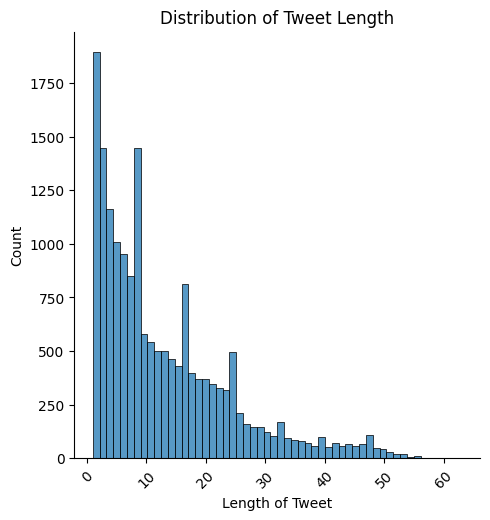

In [ ]:
#Visualize  the  length of  the  distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.displot(df.len_Text, kde=False)
plt.xticks(rotation =45)
plt.xlabel("Length of Tweet")
plt.title("Distribution of Tweet Length")
plt.savefig("TweetLength.png")
plt.show()

Insights  gained from the plot  show a right-skewed distribution of tweet lengths, with the majority of tweets being relatively short. The most common tweet length is around 5 characters, with several other noticeable peaks at lengths such as 10 and 20 characters. The frequency of tweets decreases rapidly as tweet length increases, indicating that longer tweets are much less common. Tweets longer than 40 characters are rare, highlighting a user preference for brevity

# Data Cleaning

This process is crucial for text preprocessing as it will ensures consistency by standardizing different forms of a word,\thereby enhancing the accuracy of subsequent  topic modeling.
I  removed  the  hashtags, charachers  Emojis etc

In [ ]:
import re
from nltk.corpus import  stopwords
import  spacy
import  nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nlp = spacy.load('en_core_web_sm')


def text_preprocessing(text):
    text = str(text)
    text = re.sub(r"@\S+", "", text)  # remove mentions
    text = re.sub(r"#\S+", "", text)  # remove hashtags
    text = re.sub(r"https\S+", "", text)  # remove URLs
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)  # remove special characters
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    return text

def drop_stopwords(text):
    dropped = [word for word in text.split() if word not in stop_words]
    final_text = ' '.join(dropped)
    return final_text

def lemmatization(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def delete_one_characters(text):
    deleted = [word if len(word)>1 else "" for word in text.split()]
    final_text = ' '.join(deleted)
    return final_text


df["Text"] = df["Text"].apply(text_preprocessing).apply(drop_stopwords).apply(lemmatization).apply(delete_one_characters)
df["len_Text"] = df["Text"].apply(lambda x : len(x.split()))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Tweet Id,Text,len_Text
0,1585841080431321088,bird free,2
1,1585811291851018241,falcon rocket orbit see LA,5
2,1585749627365515266,,0
3,1585667048020901888,thank,1
4,1585622194696044544,absolutely,1


In [ ]:
#Visualize  the  length of  the  distribution
print("The longest Tweet after  cleaning  the  data has: {} words".format(df["len_Text"].max()))

The longest Tweet after  cleaning  the  data has: 39 words


 Splitting  large tweets, you typically  into either paragraphs or sentences.

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
texts = df["Text"]
sentences = [sent_tokenize(text) for text in texts]
sentences = [sentence for doc in sentences for sentence in doc]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
sentences[:20]

['bird free',
 'falcon rocket orbit see LA',
 'thank',
 'absolutely',
 'Dear Twitter advertiser',
 'meeting lot cool people Twitter today',
 'Entering Twitter HQ let sink',
 'definitely close citizen journalism local news orgs appreciated amp get way prominence Twitter',
 'nobody bat 1000',
 ' beautiful thing Twitter empower citizen journalism people able disseminate news without establishment bias',
 ' big fan citizen journalism',
 'accord unnamed source close matter wish remain anonymous',
 'the New York Times emerge new chaotic actor global politic the paper intervention world combustible conflict sometimes boon messaging also cause problem',
 'yes',
 '30 lot',
 'concern',
 'work move land object',
 'fast rock',
 'have double take this first non fake Vitalik tweet  see',
 'one man hedge another man shrub']

In [ ]:
df2 = pd.DataFrame({"Cleaned_Elon_Tweets":sentences})
df2.to_csv("Cleaned_tweets.csv")

Our  tweets are  now okay to the  next  step.

# **Topic Modeling**

In this example, we will go through the main components of BERTopic and the steps necessary to create a strong topic model.




## Training

We start by instantiating BERTopic. We set language to `english` since our documents are in the English language.
We will also calculate the topic probabilities.
Let's  try with  minimum of  20 topics

In [ ]:
from bertopic import BERTopic
topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True,low_memory=True, min_topic_size=20)
topics, probs = topic_model.fit_transform(sentences)

2024-05-29 12:12:39,829 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/506 [00:00<?, ?it/s]

2024-05-29 12:12:47,725 - BERTopic - Embedding - Completed ✓
2024-05-29 12:12:47,726 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-05-29 12:13:03,971 - BERTopic - Dimensionality - Completed ✓
2024-05-29 12:13:03,972 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-05-29 12:13:30,084 - BERTopic - Cluster - Completed ✓
2024-05-29 12:13:30,095 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-05-29 12:13:30,376 - BERTopic - Representation - Completed ✓


## Extracting Topics
After fitting our model, we can start by looking at the results. Typically, we look at the most frequent topics first as they best represent the collection of documents.

In [ ]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7395,-1_tesla_amp_car_make,"[tesla, amp, car, make, year, high, it, we, go...",[that work Dragon hard something long like Fal...
1,0,401,0_yes_indeed_yesss_meta,"[yes, indeed, yesss, meta, intentionally, nope...","[yes, yes, yes]"
2,1,222,1_amp_product_service_production,"[amp, product, service, production, layer, log...","[amp, amp, amp]"
3,2,173,2_raptor_engine_pressure_nozzle,"[raptor, engine, pressure, nozzle, thrust, mer...",[center engine ship booster engine this basica...
4,3,165,3_exactly_precisely_yeah_,"[exactly, precisely, yeah, , , , , , , ]","[exactly, exactly, exactly]"


-1 refers to all outliers and should typically be ignored. Next, let's take a look at a frequent topic that were generated:

In [ ]:
topic_model.get_topic(8)  # Select the most frequent topic

[('mph', 0.06182352411767398),
 ('motor', 0.051495448721188754),
 ('tire', 0.04384144589151863),
 ('dual', 0.033938505604390434),
 ('mile', 0.029861799615132238),
 ('speed', 0.02901683294212641),
 ('sec', 0.027735289864848467),
 ('km', 0.02510143487636839),
 ('suspension', 0.025030203880972664),
 ('awd', 0.024895239193549523)]

## Attributes

There are a number of attributes that you can access after having trained your BERTopic model:


| Attribute | Description |
|------------------------|---------------------------------------------------------------------------------------------|
| topics_               | The topics that are generated for each document after training or updating the topic model. |
| probabilities_ | The probabilities that are generated for each document if HDBSCAN is used. |
| topic_sizes_           | The size of each topic                                                                      |
| topic_mapper_          | A class for tracking topics and their mappings anytime they are merged/reduced.             |
| topic_representations_ | The top *n* terms per topic and their respective c-TF-IDF values.                             |
| c_tf_idf_              | The topic-term matrix as calculated through c-TF-IDF.                                       |
| topic_labels_          | The default labels for each topic.                                                          |
| custom_labels_         | Custom labels for each topic as generated through `.set_topic_labels`.                                                               |
| topic_embeddings_      | The embeddings for each topic if `embedding_model` was used.                                                              |
| representative_docs_   | The representative documents for each topic if HDBSCAN is used.                                                |

For example, to access the predicted topics for the first 10 documents, we simply run the following:

In [ ]:
topic_model.topics_[:10]

[-1, -1, 59, 53, 10, 10, 10, 45, 12, 157]

# **Visualization**
Visualizations help understand the topics that were created.

## Visualize Topics
After having trained our `BERTopic` model, we can iteratively go through perhaps a hundred topic to get a good
understanding of the topics that were extract.

In [ ]:
topic_model.visualize_topics()

## Visualize Topic Probabilities

The variable `probabilities` that is returned from `transform()` or `fit_transform()` can
be used to understand how confident BERTopic is that certain topics can be found in a document.

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=20)

The hierarchical clustering dendrogram reveals several distinct clusters of topics, each grouping tweets with similar themes. For example:
1. Cluster 0 (Tweets 14, 18, 2, 12): These tweets likely focus on technical aspects and engineering updates, such as heat steel welding, booster ship legs, and engine pressure.
2. Cluster 1 (Tweets 19, 9, 4, 16): This cluster seems to center around specific events or product releases, such as software beta releases, autopilot features, and mentions of Dogecoin.
3. Cluster 2 (Tweets 11, 13, 15): These tweets may discuss broader concepts and philosophical musings, possibly related to physics, the universe, and life on Earth.
4. Cluster 3 (Tweets 7, 1, 17, 10): Here, the focus appears to be on business and service-related topics, including Starlink satellite terminals, product services, team collaborations, and Twitter updates.

## Visualize Terms

We can visualize the selected terms for a few topics by creating bar charts out of the c-TF-IDF scores for each topic representation. Insights can be gained from the relative c-TF-IDF scores between and within topics. Moreover, you can easily compare topic representations to each other.

In [ ]:
topic_model.visualize_barchart(top_n_topics=20,n_words=9)

The  bars reveal distinct themes and key terms associated with each topic. For instance, Topic 8 focuses on technical aspects of transportation, such as motor tire and suspension. Topic 9 is centered on product releases and updates, with terms like beta, fsd (Full Self-Driving), and release. Topic 10 highlights interactions on social media, featuring words like tweet, user, and advertiser. Topic 11 captures expressions and conversational language, with words like whoop, awesome, and great. Topic 13 discusses scientific and philosophical concepts, including physics, universe, and consciousness.

## Visualize Topic Similarity
Having generated topic embeddings, through both c-TF-IDF and embeddings, we can create a similarity matrix by simply applying cosine similarities through those topic embeddings. The result will be a matrix indicating how similar certain topics are to each other.

In [ ]:
topic_model.visualize_heatmap(n_clusters=20,)

The color intensity indicates the relevance or strength of association between a term and its corresponding topic, with darker shades signifying stronger connections.

## Visualize Term Score Decline
Topics are represented by a number of words starting with the best representative word. Each word is represented by a c-TF-IDF score. The higher the score, the more representative a word to the topic is.

In [ ]:
topic_model.visualize_term_rank()

# Update  topics

In [ ]:
topic_model.update_topics(sentences, n_gram_range=(1, 2))

In [ ]:
topic_model.get_topic(0)   # We select topic that we viewed before

[('yes yes', 0.7686498719297165),
 ('yes', 0.5243922259316279),
 ('yesss yes', 0.011441719808224553),
 ('yesss', 0.011441719808224553),
 ('yes yesss', 0.011441719808224553),
 ('yes turns', 0.011441719808224553),
 ('unfortunately yes', 0.011441719808224553),
 ('out yes', 0.011441719808224553),
 ('yes unfortunately', 0.01033744358736273),
 ('yes actually', 0.01033744358736273)]

# **Search Topics**
After having trained our model, we can use `find_topics` to search for topics that are similar
to an input search_term. Here, we are going to be searching for topics that closely relate the
search term "vehicle". Then, we extract the most similar topic and check the results:

In [ ]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics

[103, 112, 150, 8, 116]

In [ ]:
simila
for i in range(top_n_topic):
  if (similarity[i] >= similarity_threshold) & (similar_topics[i] != -1):
    print('\nTopic No: {0} with topic similarity is {1:.5f}'.format(similar_topics[i], similarity[i]) + Style.RESET_ALL)
    print(topic_model.get_topic(similar_topics[i]))

[('dragon', 0.21285391050284314),
 ('crew', 0.06773938556399337),
 ('dock', 0.043742385899328315),
 ('station', 0.039647819096770606),
 ('spacecraft', 0.030112915933005694),
 ('space', 0.026657664326775816),
 ('abort', 0.024977867365104833),
 ('flight', 0.021484122364741596),
 ('falcon', 0.020720015115567987),
 ('test', 0.02055842750221706)]